In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df=pd.read_csv("car_pred.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
final_dataset=df.drop(columns='Car_Name',axis=1)

In [9]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
final_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [11]:
categorical=['Fuel_Type','Seller_Type','Transmission','Owner']

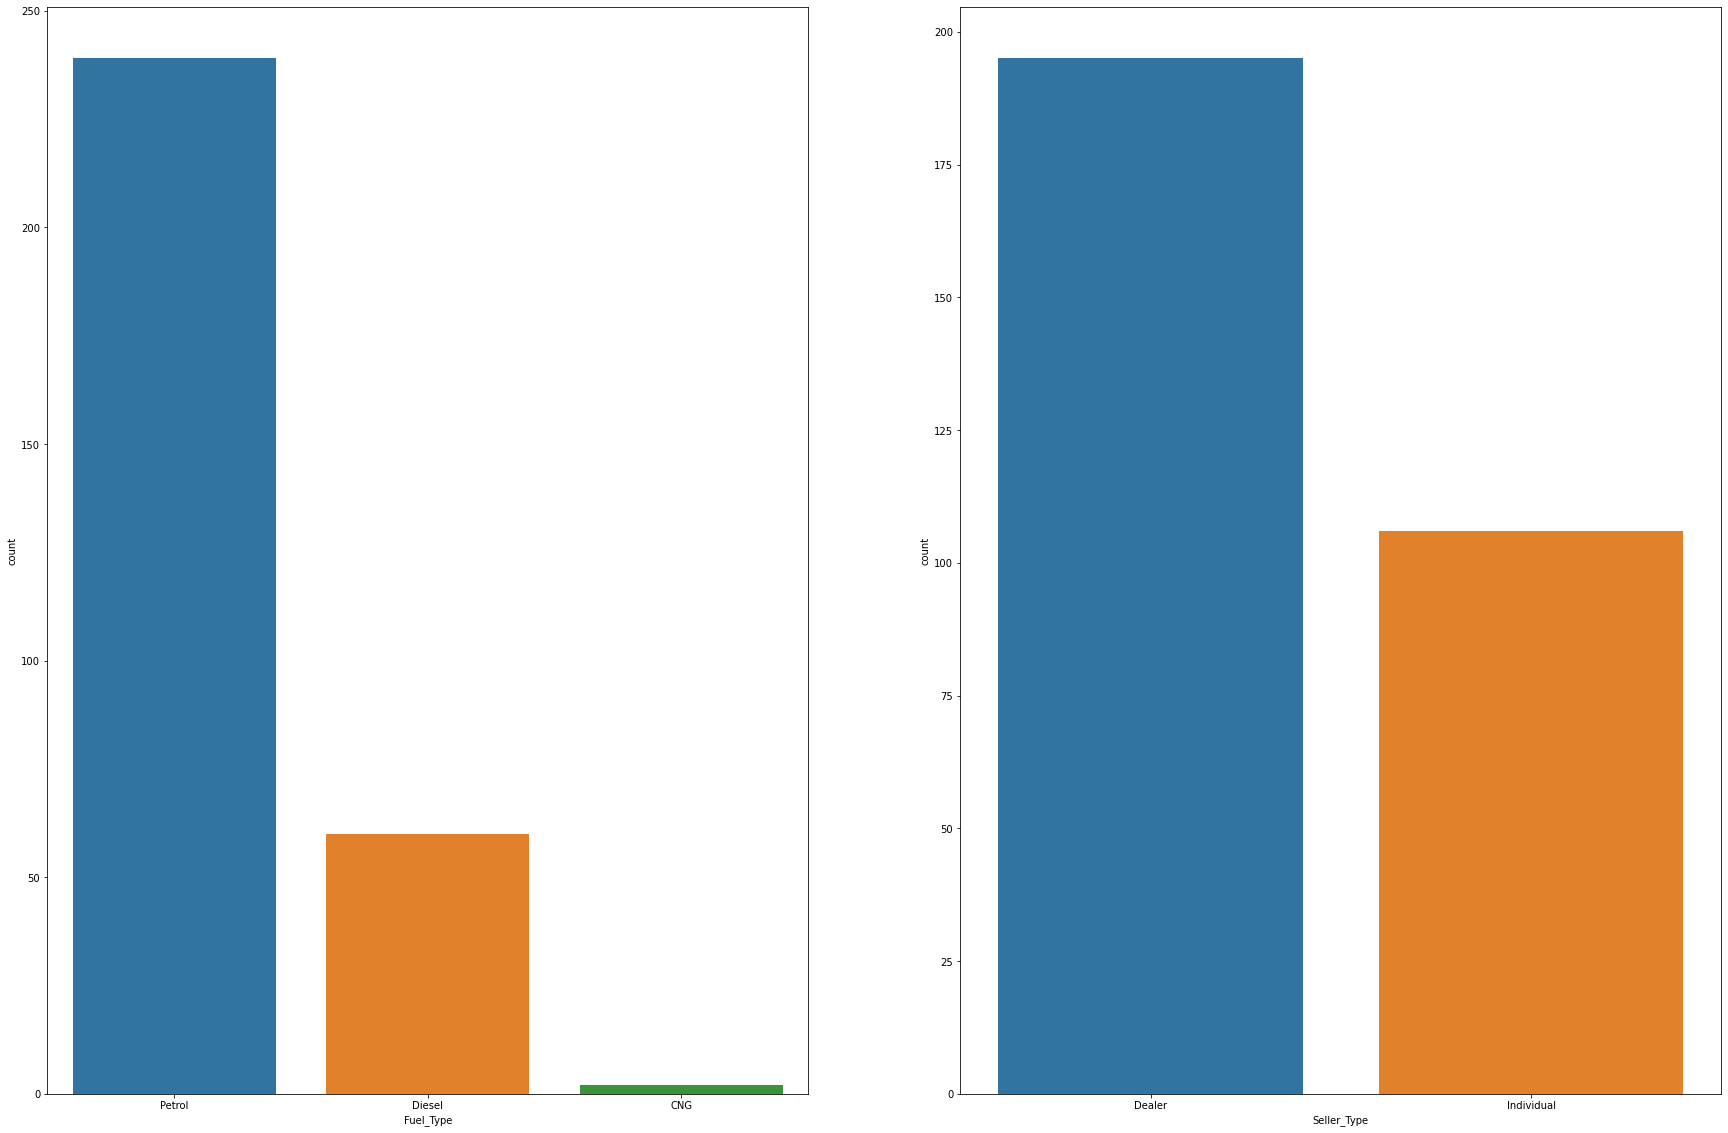

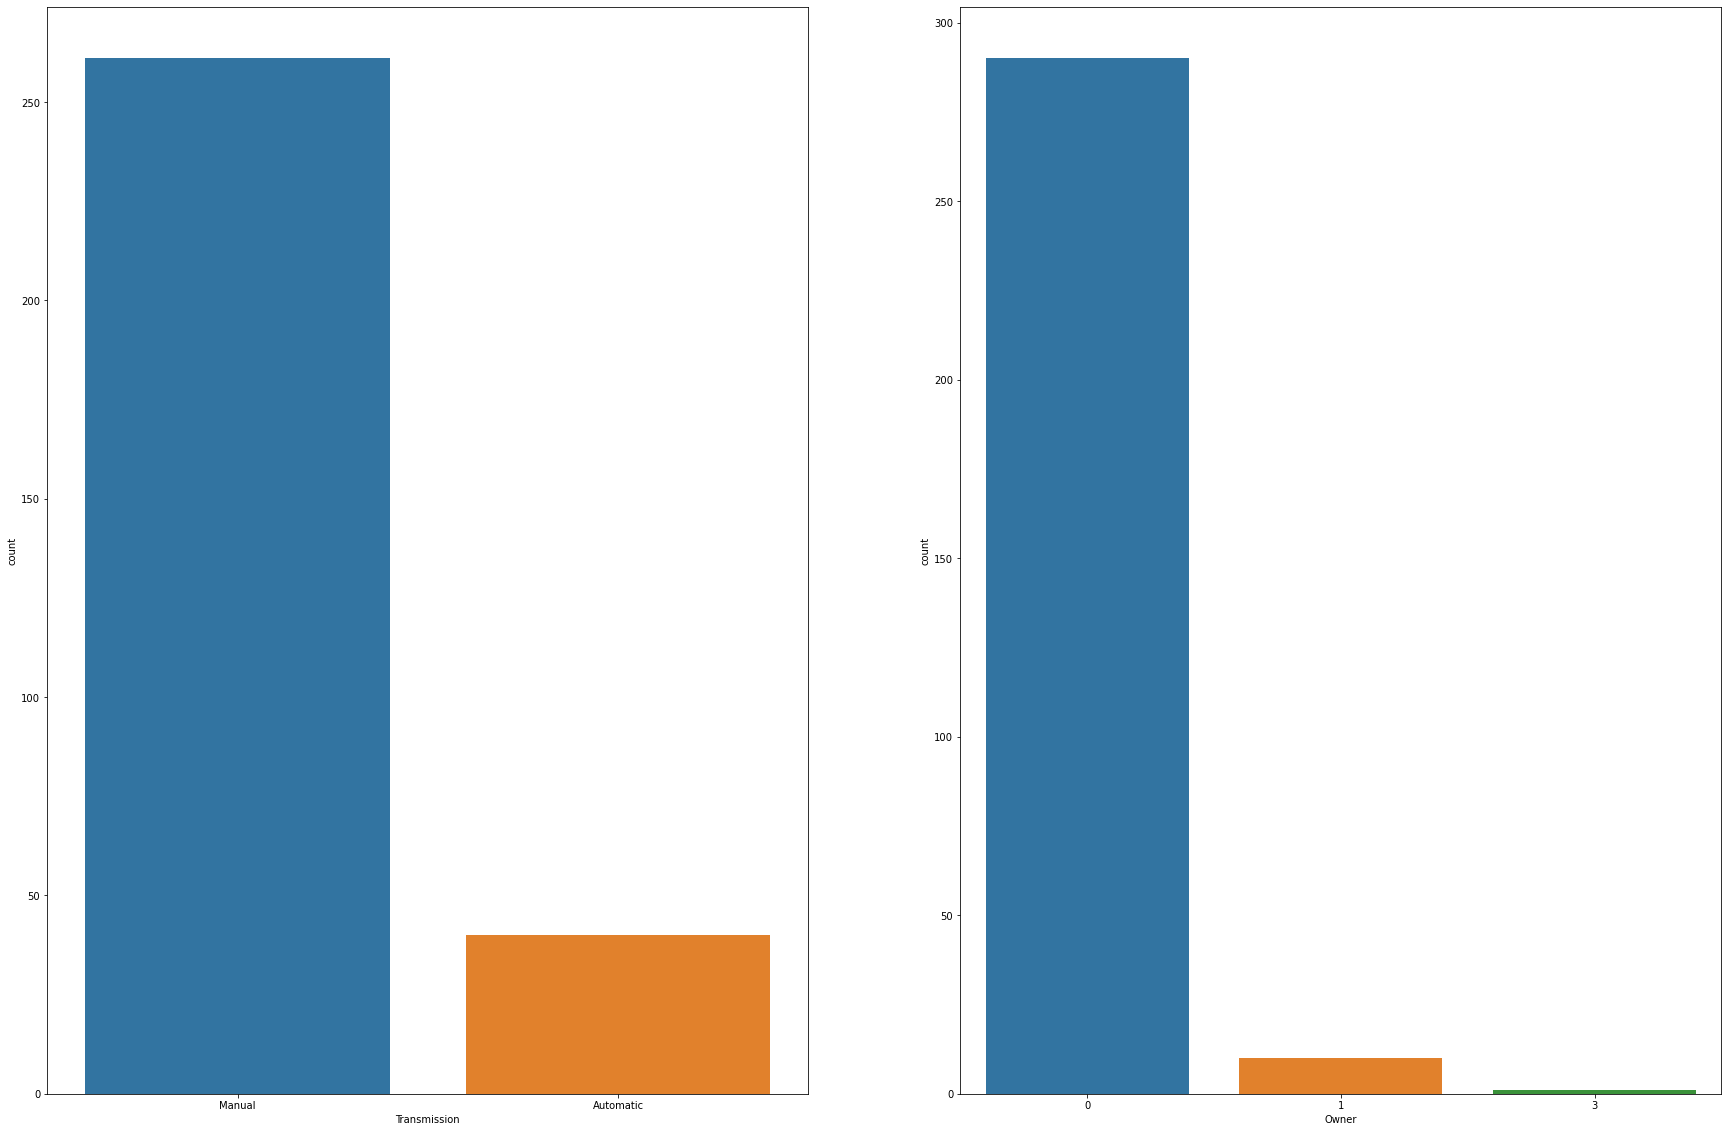

In [12]:
i=0

while i<4:
    fig=plt.figure(figsize=(30,20))
    
    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i],data=final_dataset)
    i+=1
    
    plt.subplot(1,2,2)
    sns.countplot(x=categorical[i],data=final_dataset)
    i+=1
    
    plt.show()
    



In [13]:
numerical=['Year','Selling_Price','Kms_Driven']

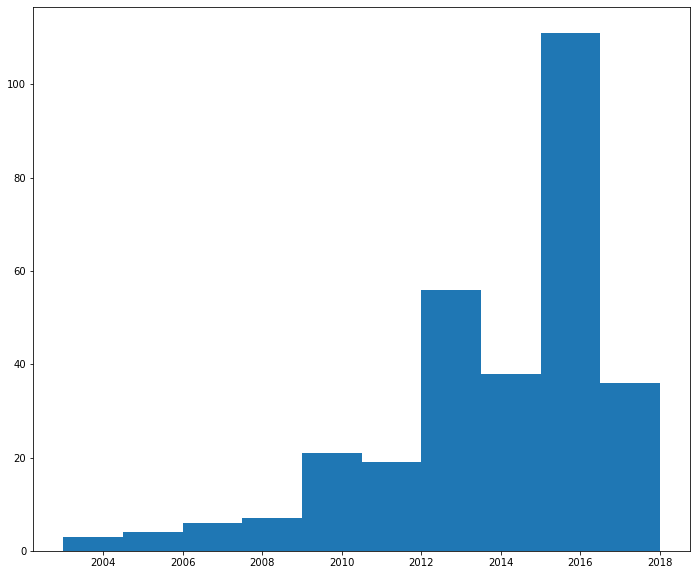

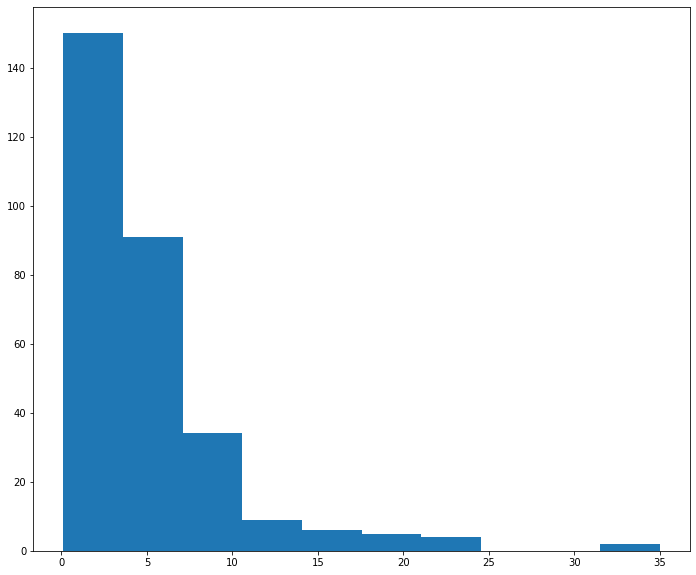

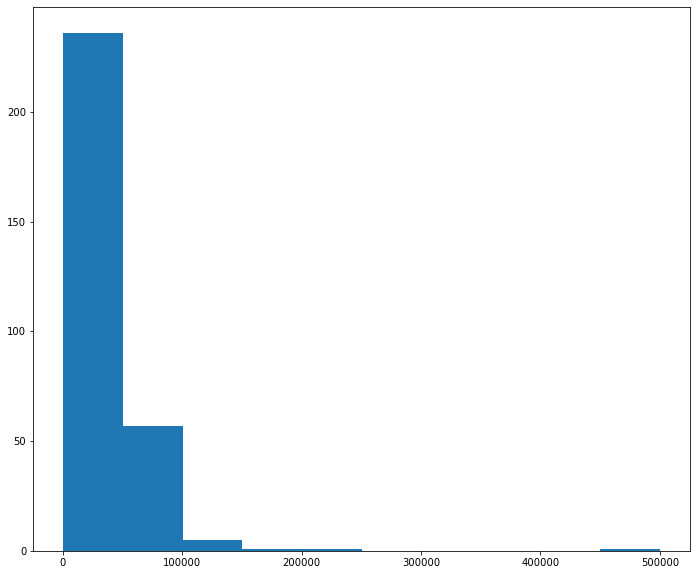

In [14]:
i=0

while i<3:
    plt.figure(figsize=(40,10))
    
    plt.subplot(1,3,1)
    plt.hist(x=numerical[i],data=final_dataset)
    i+=1

In [15]:
cols=['Year','Selling_Price','Kms_Driven']

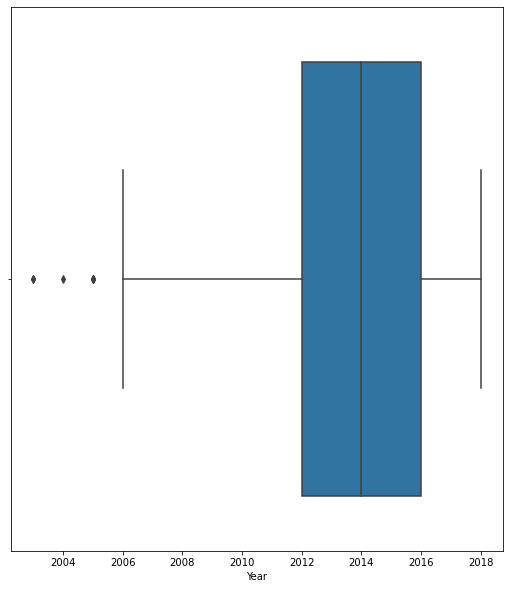

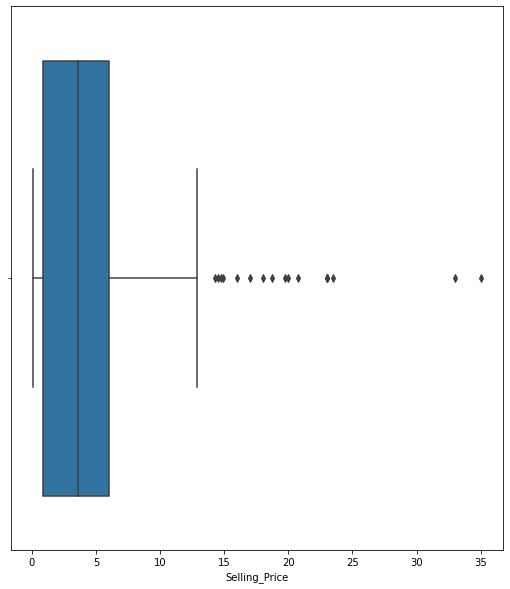

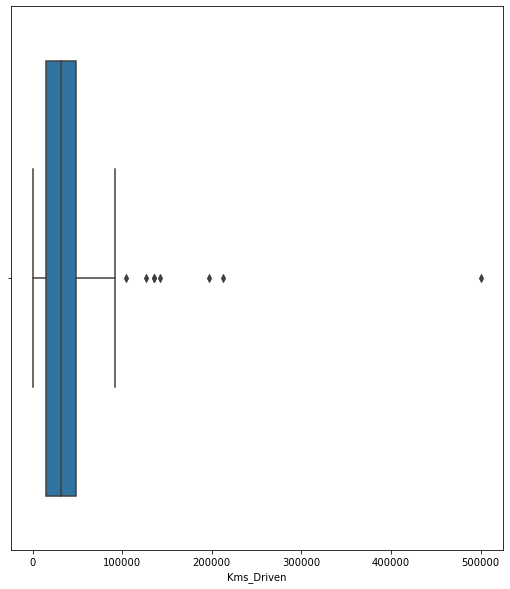

In [16]:
i=0


while i<3:
    plt.figure(figsize=(30,10))
    
    plt.subplot(1,3,1)
    sns.boxplot(x=cols[i],data=final_dataset)
    i+=1
    
    
    plt.show()

In [17]:
#percentage of outliers in numerical cols:

Q1=final_dataset.quantile(0.25)
Q3=final_dataset.quantile(0.75)

IQR=Q3-Q1

percentage=(((final_dataset < Q1-1.5*(IQR))|(final_dataset > Q3+1.5*(IQR))).sum()*100)/final_dataset.shape[0]

C:\Users\a0g0btd\Anaconda3\envs\carpred\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [18]:
percentage

Fuel_Type        0.000000
Kms_Driven       2.657807
Owner            3.654485
Present_Price    4.651163
Seller_Type      0.000000
Selling_Price    5.647841
Transmission     0.000000
Year             2.325581
dtype: float64

In [19]:
df.shape

(301, 9)

In [20]:
final_dataset['Current_Year']=2022

In [21]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [22]:
final_dataset['Total_year']=final_dataset['Current_Year']-final_dataset['Year']

In [23]:
final_dataset.drop(columns=['Year','Current_Year'],axis=1,inplace=True)

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [25]:
final_dataset=pd.get_dummies(final_dataset,drop_first=False)

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1


In [27]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [28]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [29]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [30]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

<AxesSubplot:>

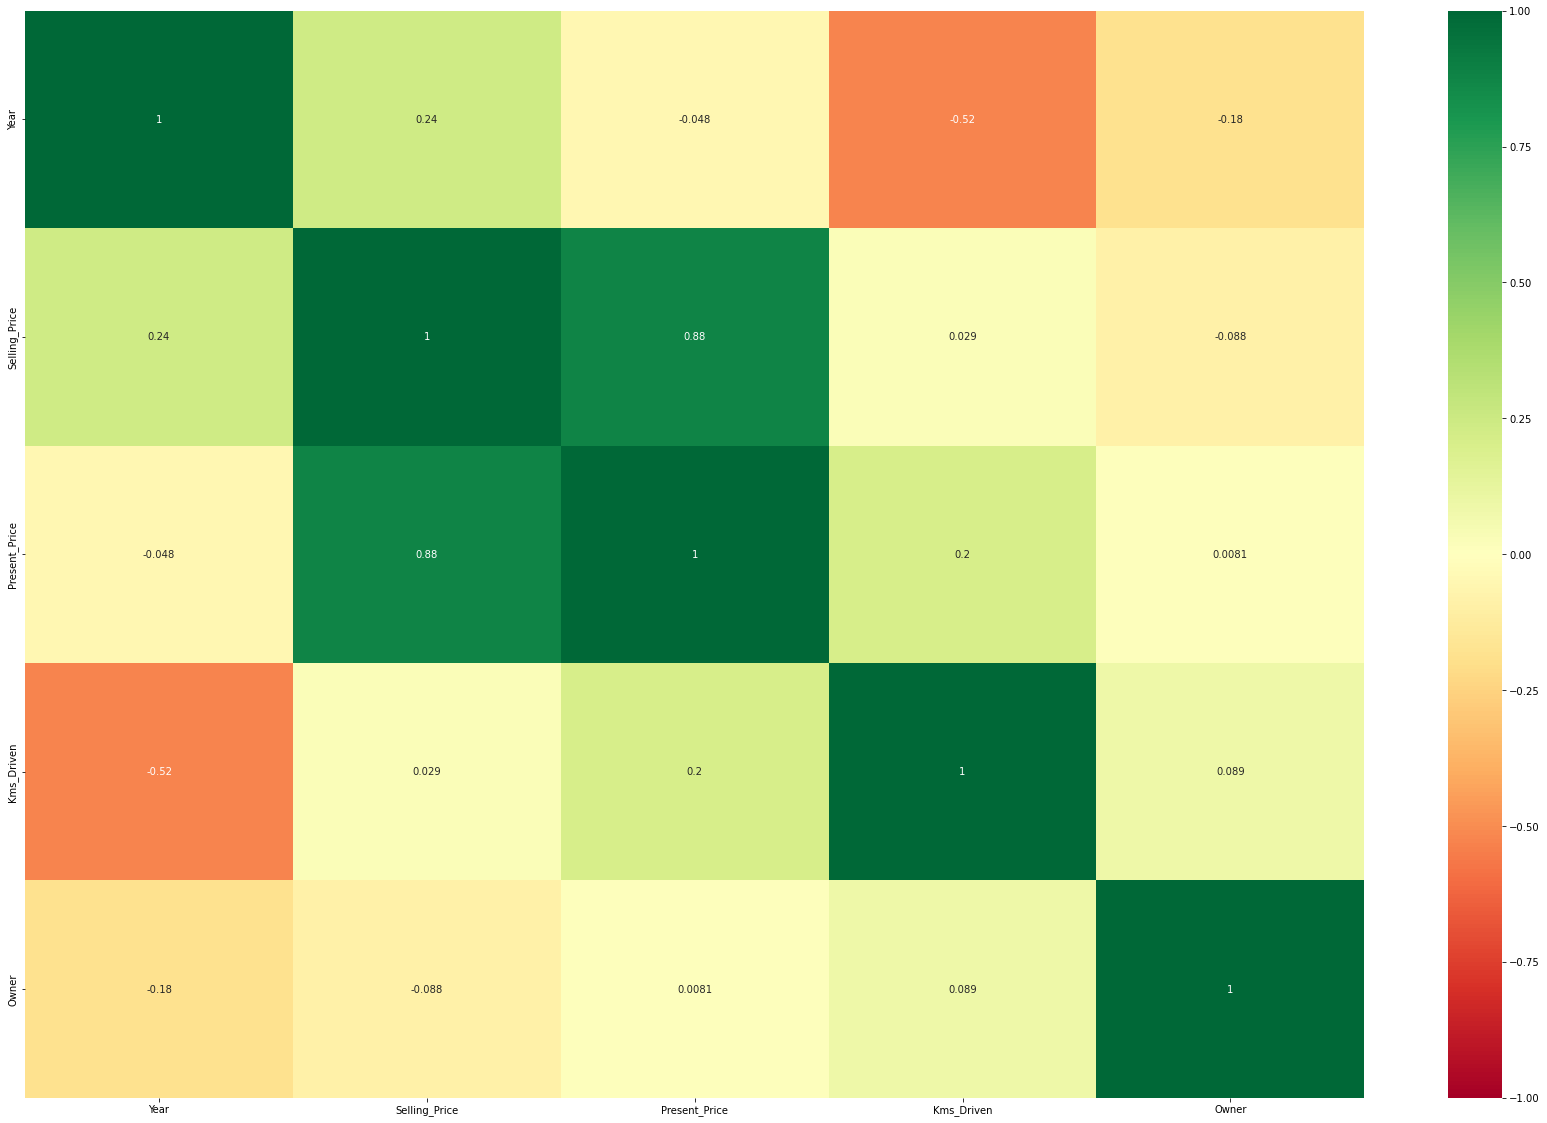

In [31]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='RdYlGn')

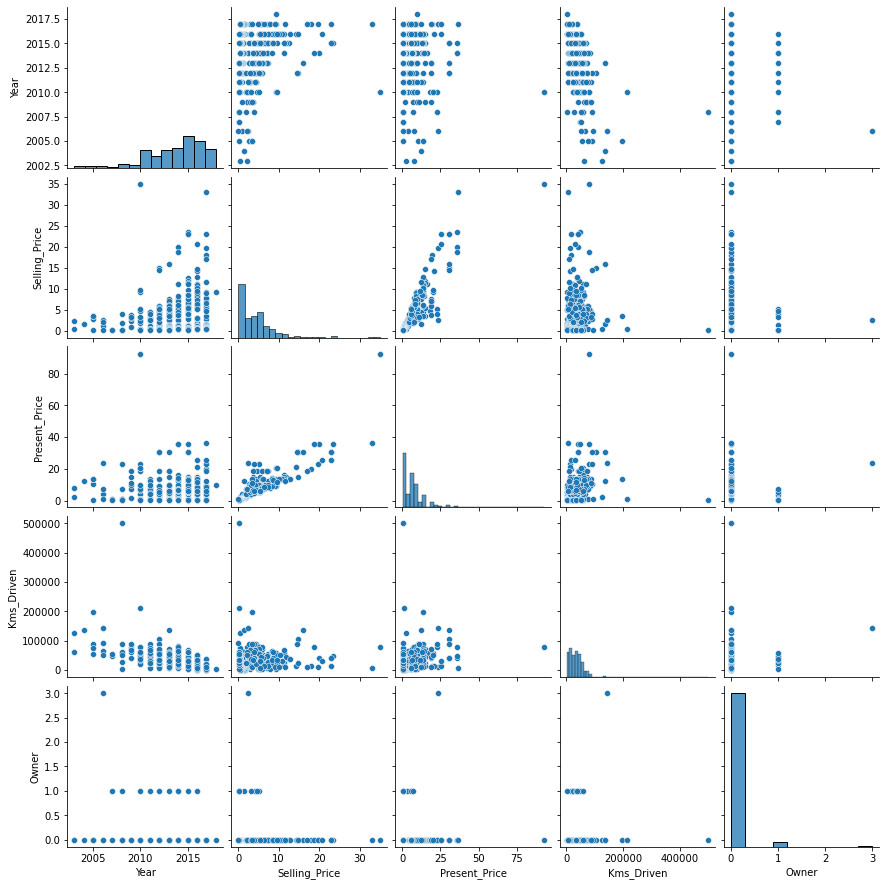

In [32]:
sns.pairplot(data=df)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [35]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
Y=final_dataset.iloc[:,0]
X=final_dataset.iloc[:,1:]

In [37]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [38]:
X

,Present_Price,Kms_Driven,Owner,Total_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,8,0,0,1,1,0,0,1
1,9.54,43000,0,9,0,1,0,1,0,0,1
2,9.85,6900,0,5,0,0,1,1,0,0,1
3,4.15,5200,0,11,0,0,1,1,0,0,1
4,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,6,0,1,0,1,0,0,1
297,5.90,60000,0,7,0,0,1,1,0,0,1
298,11.00,87934,0,13,0,0,1,1,0,0,1
299,12.50,9000,0,5,0,1,0,1,0,0,1


In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [40]:
xtrain.shape

(210, 11)

In [41]:
xtest.shape

(91, 11)

In [42]:
ytrain.shape

(210,)

In [43]:
ytest.shape

(91,)

In [44]:
import numpy as np

In [45]:
train=[]
test=[]
CV=[]
def car_pred_model(model):
    model.fit(xtrain,ytrain)
    
    y_pred_train=model.predict(xtrain)
    train_score=np.sqrt(mean_squared_error(ytrain,y_pred_train))
    train.append(train_score)
  
    
    y_pred_test=model.predict(xtest)
    test_score=np.sqrt(mean_squared_error(ytest,y_pred_test))
    test.append(test_score)
   
    
    cross_val=cross_val_score(model,xtrain,ytrain,cv=5)
    cross_val_mean=cross_val.mean()
    CV.append(cross_val_mean)    

In [46]:
lr=LinearRegression()

car_pred_model(lr)
print(train,test,CV)

[1.4915450563553692] [2.796349151051958] [0.860660416653103]


In [50]:
rf=Ridge()

alpha=np.logspace(-3,3,14)
rcv=RandomizedSearchCV(estimator=rf,param_distributions=dict(alpha=alpha))

car_pred_model(rcv)
print(train,test,CV)

[1.4915450563553692, 1.491702526056872, 1.491702526056872] [2.796349151051958, 2.8026171242672353, 2.8026171242672353] [0.860660416653103, 0.8535250803384168, 0.853114236780575]


In [51]:
ls=Lasso()

alpha=np.logspace(-3,3,num=20)

rf=RandomizedSearchCV(estimator=ls,param_distributions=dict(alpha=alpha))
car_pred_model(rf)
print(train,test,CV)

[1.4915450563553692, 1.491702526056872, 1.491702526056872, 1.492619017052065] [2.796349151051958, 2.8026171242672353, 2.8026171242672353, 2.8105316827944664] [0.860660416653103, 0.8535250803384168, 0.853114236780575, 0.8556434141112066]


In [55]:
rfr=RandomForestRegressor()

n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

rzc=RandomizedSearchCV(estimator=rfr,param_distributions=param_distributions)

car_pred_model(rzc)

C:\Users\a0g0btd\Anaconda3\envs\carpred\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\a0g0btd\Anaconda3\envs\carpred\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\a0g0btd\Anaconda3\envs\carpred\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\a0g0btd\Anaconda3\envs\carpred\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [56]:
print(train,test,CV)

[1.4915450563553692, 1.491702526056872, 1.491702526056872, 1.492619017052065, 0.6021386605453233] [2.796349151051958, 2.8026171242672353, 2.8026171242672353, 2.8105316827944664, 2.8951774020640837] [0.860660416653103, 0.8535250803384168, 0.853114236780575, 0.8556434141112066, 0.9198297564247039]


In [57]:
gbr=GradientBoostingRegressor()

learning_rate=[0.0001,0.001,0.1]

n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"learning_rate":learning_rate,
                    "n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

gb_rc=RandomizedSearchCV(estimator=gbr,param_distributions=param_distributions)

car_pred_model(gb_rc)

print(train,test,CV)

[1.4915450563553692, 1.491702526056872, 1.491702526056872, 1.492619017052065, 0.6021386605453233, 0.06931544053411487] [2.796349151051958, 2.8026171242672353, 2.8026171242672353, 2.8105316827944664, 2.8951774020640837, 2.9455200689008643] [0.860660416653103, 0.8535250803384168, 0.853114236780575, 0.8556434141112066, 0.9198297564247039, 0.9439284991576088]


In [76]:
results=pd.DataFrame([train,test,CV],columns=['Linear_Regression','Ridge','Ridge_1','Lasso','RFR','GBR'],index=['Train','Test','CV'])

In [77]:
results

,Linear_Regression,Ridge,Ridge_1,Lasso,RFR,GBR
Train,1.491545,1.491703,1.491703,1.492619,0.602139,0.069315
Test,2.796349,2.802617,2.802617,2.810532,2.895177,2.945520
CV,0.860660,0.853525,0.853114,0.855643,0.919830,0.943928


In [81]:
import pickle

file=open('gradient_boosting.pkl','wb')
pickle.dump(gb_rc,file)

In [82]:
pickle_in=open("gradient_boosting.pkl",'rb')
best_model=pickle.load(pickle_in)

In [84]:
best_model.predict([[9.54,43000,0,8,0,0,1,1,0,0,1]])

C:\Users\a0g0btd\Anaconda3\envs\carpred\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([6.10391205])